## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [7]:
import numpy  as np
import pandas as pd

n_sample=1000

ratio_class_0=0.9
n_class_0= int(ratio_class_0*n_sample)
n_class_1= n_sample - n_class_0
n_class_0,n_class_1

(900, 100)

In [9]:
## Creating the Imbalance dataframe

## here we are using the random  function to create the data and using normal means that the feature will have the normal distribution loc=means, scale=std

class_0 = pd.DataFrame({
    'f1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'f2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})
class_1=pd.DataFrame({
    'f1':np.random.normal(loc=0,scale=1,size=n_class_1),
    'f2':np.random.normal(loc=0,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})
class_1.head()

,f1,f2,target
0,0.832796,0.125531,1
1,-0.633417,-0.267009,1
2,2.368628,-0.552487,1
3,-2.252505,-0.042036,1
4,0.145287,0.428161,1


In [10]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df

,f1,f2,target
0,-0.312860,-0.916582,0
1,1.355430,0.240025,0
2,0.024594,1.517009,0
3,-0.751974,0.647704,0
4,-0.206611,0.639392,0
...,...,...,...
995,-0.844806,-0.343817,1
996,0.302891,1.144104,1
997,-0.597619,1.308382,1
998,0.443607,0.760936,1


In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import sklearn
from sklearn.utils import resample
df_upsample=resample(class_1,replace=True,
                    n_samples=len(class_0),
                     random_state=42)

In [23]:
df_upsample.shape

(900, 3)

In [24]:
df_balance=pd.concat([class_0,df_upsample])

In [25]:
import seaborn as sns

<Axes: xlabel='f1', ylabel='f2'>

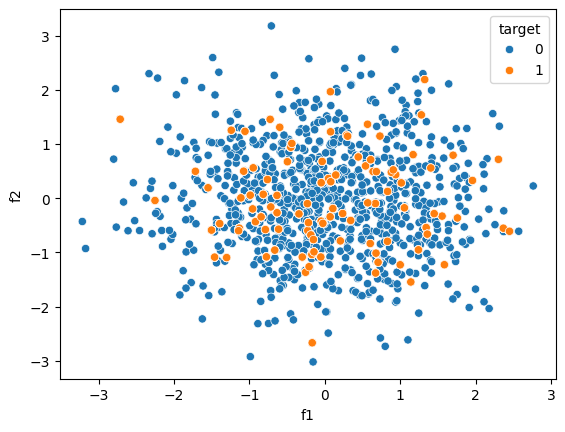

In [29]:
sns.scatterplot(data=df_balance,x='f1',y='f2',hue='target')

<Axes: xlabel='f1', ylabel='f2'>

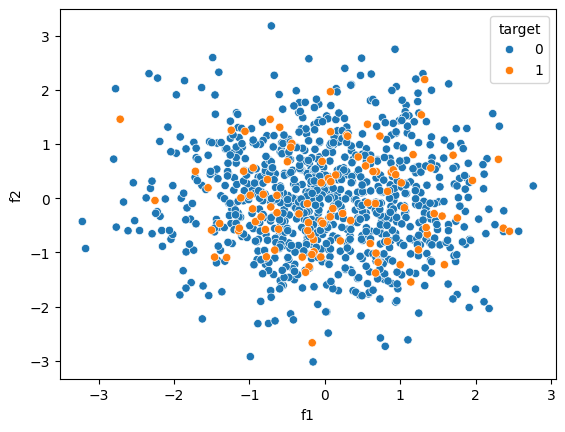

In [30]:
sns.scatterplot(data=df,x='f1',y='f2',hue='target')

 simlarly we can also down sampled it by decreasing the rows from the majority class
 but this is not good idea as we have to loss the data

for down sampling just we have to **replace=false** and write the class which have the **majority data**

There is a issue with the sampling is that when put the data in minority class then they donot create new data just duplicates the existing data only that why  variance doesn't changes so to tackle this we come up with **SMOTE**  as solution

  ## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [33]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE


In [40]:
over_sample=SMOTE()
x,y=over_sample.fit_resample(df[['f1','f2']],df[['target']])

In [41]:
x.shape

(1800, 2)

In [42]:
x.head()

,f1,f2
0,-0.312860,-0.916582
1,1.355430,0.240025
2,0.024594,1.517009
3,-0.751974,0.647704
4,-0.206611,0.639392


In [43]:
y.shape

(1800, 1)

In [45]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [49]:
df1=pd.DataFrame(x, columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_data=pd.concat([df1,df2],axis=1)
oversample_data

,f1,f2,target
0,-0.312860,-0.916582,0
1,1.355430,0.240025,0
2,0.024594,1.517009,0
3,-0.751974,0.647704,0
4,-0.206611,0.639392,0
...,...,...,...
1795,-1.496605,-0.666052,1
1796,1.039643,-0.154405,1
1797,1.458323,-0.906997,1
1798,-0.216167,-0.456474,1


<Axes: xlabel='f1', ylabel='f2'>

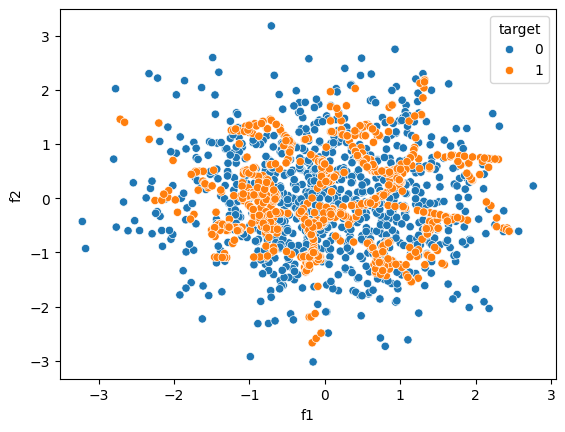

In [50]:
sns.scatterplot(data=oversample_data,x='f1',y='f2',hue='target')